# Autoencoder on Stock Market Data
### Dan Schmidt's Script Fall 2016

In [5]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)
%aimport preprocess
from preprocess.process import get_symbol
from preprocess.process import get_symbols_matrix
from preprocess.process import df_to_returns
from preprocess.process import get_windows_rets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from IPython.core.debugger import Tracer
import scipy as sp

from keras.models import Model
from keras.layers import Input, Dense

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Load in the data
# Use tickers in the Dow Jones for most of this analysis
data_loc = "/home/dan/code/market_data/"
symbols = [line.rstrip('\n') for line in open(data_loc+'dow_jones_industrial.txt')]

train_start_date = "03/01/2015"
train_end_date = "03/14/2015"

test_start_date = "03/15/2015"
test_end_date = "03/21/2015"

test_symbols = symbols

aapl = get_symbol("AAPL", data_loc, train_start_date, train_end_date)
aapl_rets, aaply_y = get_windows_rets(aapl, window_offset=1)

Reading AAPL from pickle
(3190, 60)


## Define the Model

In [46]:
# Define some parameters
#
# Using perfect reconstruction to show an autoencoder can work
window_length = 60
encoding_dim = 60


input_w = Input(shape=(window_length,))

encoding = Dense(
    encoding_dim,
    init='normal', 
    activation='tanh')(input_w)
decoding = Dense(
    window_length,
    init='normal',
    activation='linear')(encoding)

w_autoencoder = Model(input=input_w, output=decoding)
w_autoencoder.compile(optimizer='adagrad', loss='mse')
w_autoencoder.fit(
    aapl_rets, 
    aapl_rets, 
    batch_size=256,
    nb_epoch=256,
    shuffle=True, 
    validation_data=(aapl_rets, aapl_rets) 
)

reconstructed = w_autoencoder.predict(aapl_rets)

for i in range(3):
    plt.plot(aapl_rets[i, :])
    plt.plot(reconstructed[i, :])
    plt.show()

Train on 3190 samples, validate on 3190 samples
Epoch 1/256
3190/3190 [==============================] - 0s - loss: 1.6138e-05 - val_loss: 3.9262e-07
Epoch 2/256
3190/3190 [==============================] - 0s - loss: 3.7806e-07 - val_loss: 3.7286e-07
Epoch 3/256
3190/3190 [==============================] - 0s - loss: 3.6623e-07 - val_loss: 3.6196e-07
Epoch 4/256
3190/3190 [==============================] - 0s - loss: 3.5787e-07 - val_loss: 3.5531e-07
Epoch 5/256
3190/3190 [==============================] - 0s - loss: 3.4938e-07 - val_loss: 3.4724e-07
Epoch 6/256
3190/3190 [==============================] - 0s - loss: 3.4212e-07 - val_loss: 3.3922e-07
Epoch 7/256
3190/3190 [==============================] - 0s - loss: 3.3589e-07 - val_loss: 3.3636e-07
Epoch 8/256
3190/3190 [==============================] - 0s - loss: 3.3032e-07 - val_loss: 3.2722e-07
Epoch 9/256
3190/3190 [==============================] - 0s - loss: 3.2375e-07 - val_loss: 3.2151e-07
Epoch 10/256
3190/3190 [==========

Train on 3190 samples, validate on 3190 samples
Epoch 1/256
3190/3190 [==============================] - 0s - loss: 5.6709e-07 - val_loss: 4.6742e-07
Epoch 2/256
3190/3190 [==============================] - 0s - loss: 4.3047e-07 - val_loss: 4.0755e-07
Epoch 3/256
3190/3190 [==============================] - 0s - loss: 3.9630e-07 - val_loss: 3.8997e-07
Epoch 4/256
3190/3190 [==============================] - 0s - loss: 3.8977e-07 - val_loss: 3.8734e-07
Epoch 5/256
3190/3190 [==============================] - 0s - loss: 3.8754e-07 - val_loss: 3.8694e-07
Epoch 6/256
3190/3190 [==============================] - 0s - loss: 3.8680e-07 - val_loss: 3.8881e-07
Epoch 7/256
3190/3190 [==============================] - 0s - loss: 3.8776e-07 - val_loss: 3.8896e-07
Epoch 8/256
3190/3190 [==============================] - 0s - loss: 3.8821e-07 - val_loss: 3.8644e-07
Epoch 9/256
3190/3190 [==============================] - 0s - loss: 3.8679e-07 - val_loss: 3.8676e-07
Epoch 10/256
3190/3190 [==========

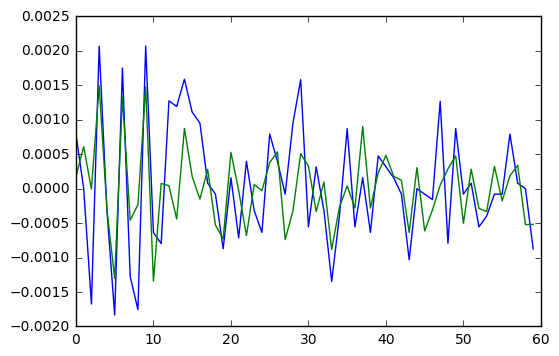

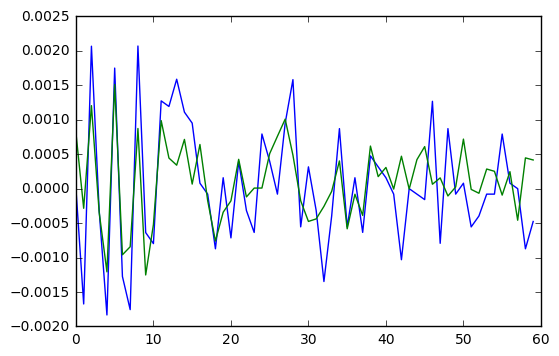

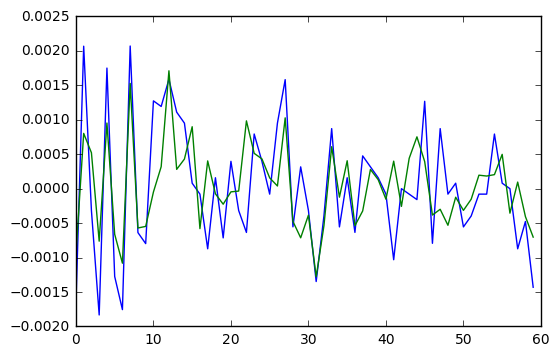

In [52]:
# Define some parameters
#
# Compressing the representation 

window_length = 60
encoding_dim = 15

input_w = Input(shape=(window_length,))

encoding = Dense(
    encoding_dim,
    init='normal', 
    activation='tanh')(input_w)
decoding = Dense(
    window_length,
    init='normal',
    activation='linear')(encoding)

w_autoencoder = Model(input=input_w, output=decoding)
w_autoencoder.compile(optimizer='adam', loss='mse')
w_autoencoder.fit(
    aapl_rets, 
    aapl_rets, 
    batch_size=256,
    nb_epoch=256,
    shuffle=True, 
    validation_data=(aapl_rets, aapl_rets) 
)

reconstructed = w_autoencoder.predict(aapl_rets)

for i in range(3):
    plt.plot(aapl_rets[i, :])
    plt.plot(reconstructed[i, :])
    plt.show()